# **Gradient Descent**

Last time, we implemented the simple linear regression using Ordinary Least Squared Method. OLS is perfect for one independent variable, but it gets messy when there are more independent variables. We find the least amount of squared difference in actual vs predicted value in OLS. 

However, gradient descent is different. It is a way to find the minimum value of a function, by iteratively taking steps in the direction of the steepest descent of the function

Yeah Yeah. 

In OLS, we use mathematical formulas to directly calculate the best slope (m) and intercept (c) for ``y = mx + c``. Gradient descent takes a different approach - instead of using formulas, it uses an iterative process.

Here's how it works: Gradient descent starts with random guesses for ``m`` and ``c``, then repeatedly adjusts these values to minimize the prediction error. When the process finishes, we end up with three results: the optimal slope (m), the optimal intercept (c), and the minimum possible error (MSE).

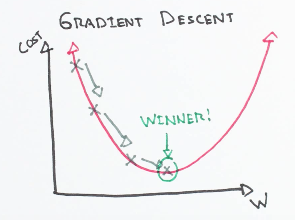

Credit: ML Learning Glossary


In [1]:
from IPython.display import Image, display
display(Image('/kaggle/input/images/gradient_descent.jpg', width=450))
print("Credit: ML Learning Glossary")

Imagine you are on the one side of a U-shaped steep hill, and you are blind folded. Your mission is to get to the lowest point of that steep. How would you do it? When you take a step, you would probably feel steepness benath you. And by following that steepness, you would take one step at a time until you reached the minimum point or a "valley", and you would stop there until uphill starts.

This is the best way to imagine Gradient Descent.

The term gradient refers to *rate of change in linear format* and descent refers to *going downwards*. That's exactly what we do with the help of gradient descent. We take the dummy slope and intercept, then we iterate those value until the difference of last ``m`` and ``c`` is close to 0.0001 or very small.

### **The Most Simple Intuition**



It is to minimize the cost function or the total error.

How? By adjusting the values of ``m`` and ``c`` or weight/slope and coefficient/intercept respectively with iteration.

When you plot the ``error or MSE`` against ``m`` and ``c``, you get the valley like structure with descends or slopes and lowest point. What does slopes and lowest point denote? Each point in that plane denotes the ``error``. Highest point denoting the highest error, and lowest point being the lowest error. And we focus on the latter.

What we do in gradient descent is to take a random value of ``m`` and ``c``, then adjust their values so that we move downhill until we reach the lowest point, which is our lowest error.

#### **How the valley would look like with m, c and j(error)**

Dont care about the code written below, it's just a dummy code.

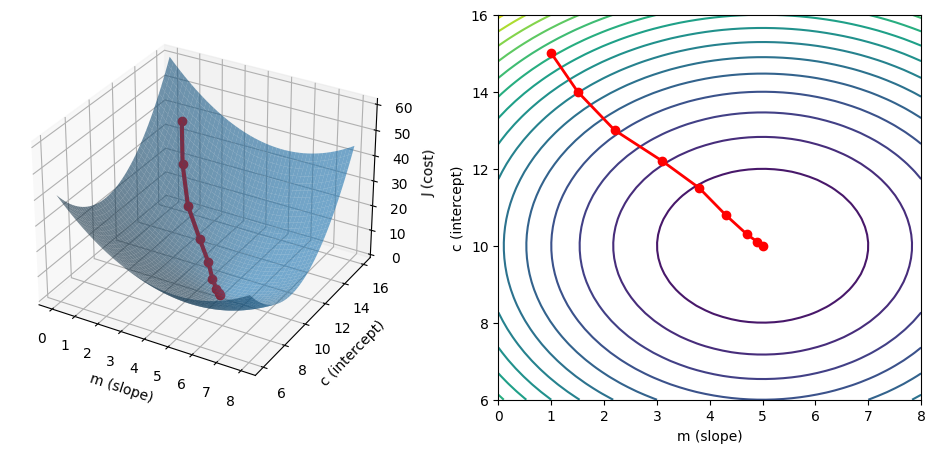

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Dummy cost function: J = (m-5)^2 + (c-10)^2
def cost_function(m, c):
    return (m - 5)**2 + (c - 10)**2

# Gradient descent path (manually created dummy data)
m_path = [1, 1.5, 2.2, 3.1, 3.8, 4.3, 4.7, 4.9, 5.0]  # slope values
c_path = [15, 14, 13, 12.2, 11.5, 10.8, 10.3, 10.1, 10.0]  # intercept values
j_path = [cost_function(m, c) for m, c in zip(m_path, c_path)]  # cost values

# Create grid for surface
m_grid = np.linspace(0, 8, 50)
c_grid = np.linspace(6, 16, 50)
M, C = np.meshgrid(m_grid, c_grid)
J = cost_function(M, C)

# 3D plot
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(M, C, J, alpha=0.6)
ax1.plot(m_path, c_path, j_path, 'ro-', linewidth=3)
ax1.set_xlabel('m (slope)')
ax1.set_ylabel('c (intercept)')
ax1.set_zlabel('J (cost)')

# Contour plot
ax2 = fig.add_subplot(122)
ax2.contour(M, C, J, levels=15)
ax2.plot(m_path, c_path, 'ro-', linewidth=2)
ax2.set_xlabel('m (slope)')
ax2.set_ylabel('c (intercept)')

plt.show()

On the left is the 3d representation of the valley with implementation of gradient descent - we're travelling from top hill to the bottom of the valley i.e. minimizing the error.

And on the right we have, contour diagram. Basically, on the center of the circle with the lowest diameter lies our lowest error.

We started our journey with ``m = 1`` and ``c = 15`` then with each iteration, we improved and achieved our lowest possible error with ``m = 5`` and ``c = 10``

### **Math behind Gradient Descent**

**Goal:** Find the best-fit line for data by minimizing prediction error.

**Step 1:** Define our cost function (Mean Squared Error):  
``J(m, c) = (1/N) * Σ (yᵢ - (mxᵢ + c))²``

**Step 2:** Compute how J changes with respect to m and c (gradients):
- ``∂J/∂m: tells us how much J increases/decreases if m changes.``
- ``∂J/∂c: tells us how much J increases/decreases if c changes.``

**Step 3:** Update m and c in the direction that makes J smaller:
- ``m_new = m_old - learning_rate * ∂J/∂m``
- ``c_new = c_old - learning_rate * ∂J/∂c``

**Step 4:** Repeat the process until ``J`` stops decreasing.

### **Implementing Gradient Descent**

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = np.loadtxt("/kaggle/input/weight-hight-dataset/weight-height (1).csv", delimiter=",", skiprows=1, usecols=(1, 2), dtype="float")
print(data)

[[ 73.84701702 241.89356318]
 [ 68.78190405 162.31047252]
 [ 74.11010539 212.74085556]
 ...
 [ 63.86799221 128.47531878]
 [ 69.03424313 163.85246135]
 [ 61.94424588 113.64910268]]


In [5]:
x = data[:, 0]
y = data[:, 1]
x, y

(array([73.84701702, 68.78190405, 74.11010539, ..., 63.86799221,
        69.03424313, 61.94424588]),
 array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
        163.85246135, 113.64910268]))

This is how our dataset looks like.

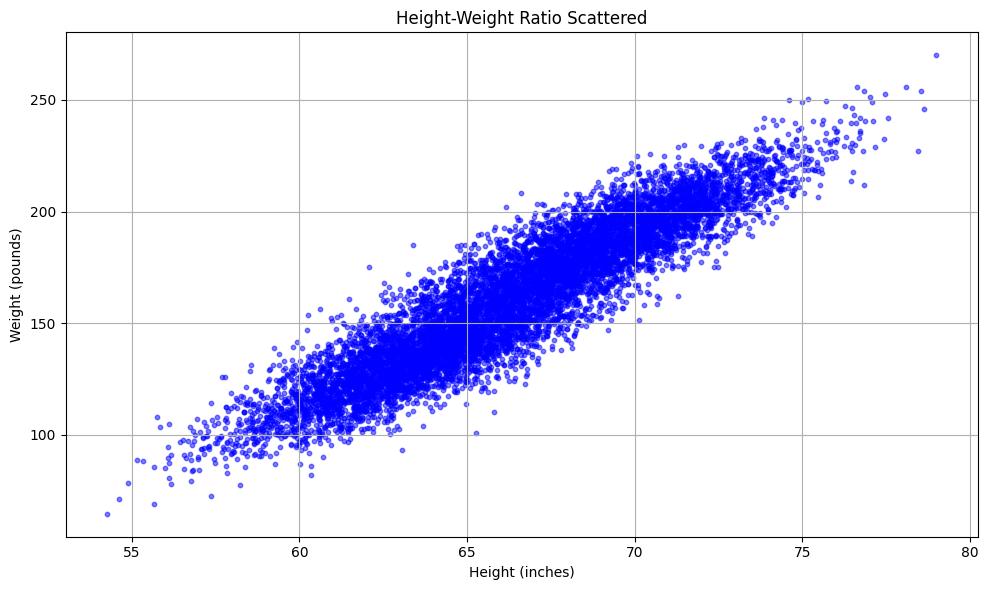

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, s=10, color='blue')
plt.grid(True)
plt.title("Height-Weight Ratio Scattered")
plt.xlabel("Height (inches)")
plt.ylabel("Weight (pounds)")
plt.tight_layout()
plt.show()

Now the real thing begins.

What we need to do here is to find the best-fit line or to find the optimal ``m`` and ``c``, that gives us the lowest `mean squared error``.

Here, we don't find one single output, rather the ``m``, ``c`` and ``error or MSE`` adjust itself for the optimal with the help of Gradient Descent.

First we need to randomly place the ``m`` and ``c`` value, define the ``learning_rate``(how big step to take) and ``num_iter``(number of iterations or the number of steps to find the lowest point)

In [7]:
m = 0
c = 0
learning_rate = 0.01
num_iter = 1000
N = len(x)

In [8]:
for i in range(num_iter):  
    y_pred = m * x + c
    dm = (-2/N) * np.sum(x*(y - y_pred))
    dc = (-2/N) * np.sum(y - y_pred)
    m = m - learning_rate * dm
    c = c - learning_rate * dc
    print(f"Step: {i}, Slope(m): {m}, Intercept(c): {c}")

Step: 0, Slope(m): 216.57267522246764, Intercept(c): 3.228807136656616
Step: 1, Slope(m): -18713.804171888387, Intercept(c): -281.07496115119227
Step: 2, Slope(m): 1635972.1545712857, Intercept(c): 24567.565677565006
Step: 3, Slope(m): -142998526.7770027, Intercept(c): -2147430.1513435193
Step: 4, Slope(m): 12499363110.012766, Intercept(c): 187704787.09497315
Step: 5, Slope(m): -1092557237740.0345, Intercept(c): -16407093867.437733
Step: 6, Slope(m): 95499371245677.27, Intercept(c): 1434128203238.6235
Step: 7, Slope(m): -8347507657506193.0, Intercept(c): -125355758914729.8
Step: 8, Slope(m): 7.296475692271159e+17, Intercept(c): 1.0957225621530972e+16
Step: 9, Slope(m): -6.377778818810791e+19, Intercept(c): -9.577604919037135e+17
Step: 10, Slope(m): 5.57475476890274e+21, Intercept(c): 8.371691809002604e+19
Step: 11, Slope(m): -4.872839215079376e+23, Intercept(c): -7.317614825144322e+21
Step: 12, Slope(m): 4.2593016195919505e+25, Intercept(c): 6.396256330361922e+23
Step: 13, Slope(m): -3

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipykernel_13/512648427.py:5: RuntimeWarning: invalid value encountered in scalar subtract
  m = m - learning_rate * dm
